# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [24]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [25]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | bambous virieux
Processing Record 3 of Set 1 | cherskiy
Processing Record 4 of Set 1 | new norfolk
Processing Record 5 of Set 1 | hobart
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | bandarbeyla
Processing Record 9 of Set 1 | saskylakh
Processing Record 10 of Set 1 | geraldton
Processing Record 11 of Set 1 | san cristobal
Processing Record 12 of Set 1 | camacha
Processing Record 13 of Set 1 | souillac
Processing Record 14 of Set 1 | nikolskoye
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | vardo
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | severo-kurilsk
Processing Record 19 of Set 1 | lazaro cardenas
Processing Record 20 of Set 1 | christchurch
Processing Record 21 of Set 1 | ancud
Processing Record 22 of Set 1 | clyde river
Processing Re

In [26]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [27]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,3.48,59,95,2.11,US,1674943325
1,bambous virieux,-20.3428,57.7575,25.68,85,94,1.40,MU,1674943327
2,cherskiy,68.7500,161.3000,-29.82,97,100,1.85,RU,1674943328
3,new norfolk,-42.7826,147.0587,18.73,48,66,1.34,AU,1674943329
4,hobart,-42.8794,147.3294,18.92,64,75,3.60,AU,1674943330


In [28]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [29]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,3.48,59,95,2.11,US,1674943325
1,bambous virieux,-20.3428,57.7575,25.68,85,94,1.40,MU,1674943327
2,cherskiy,68.7500,161.3000,-29.82,97,100,1.85,RU,1674943328
3,new norfolk,-42.7826,147.0587,18.73,48,66,1.34,AU,1674943329
4,hobart,-42.8794,147.3294,18.92,64,75,3.60,AU,1674943330


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

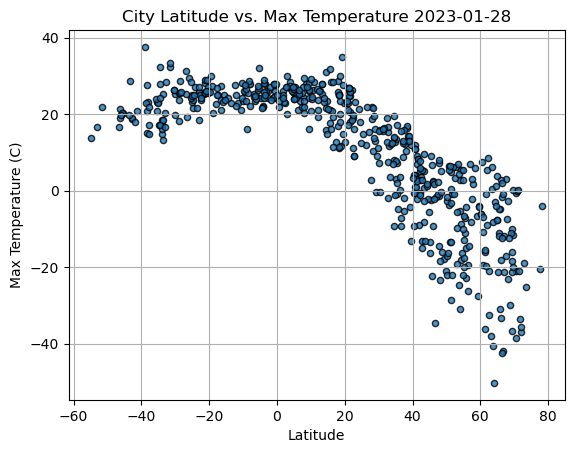

In [30]:
# Build scatter plot for latitude vs. temperature
ax1 = city_data_df.plot.scatter(x='Lat', y='Max Temp',edgecolor='black',alpha=0.8, marker='o')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature 2023-01-28")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

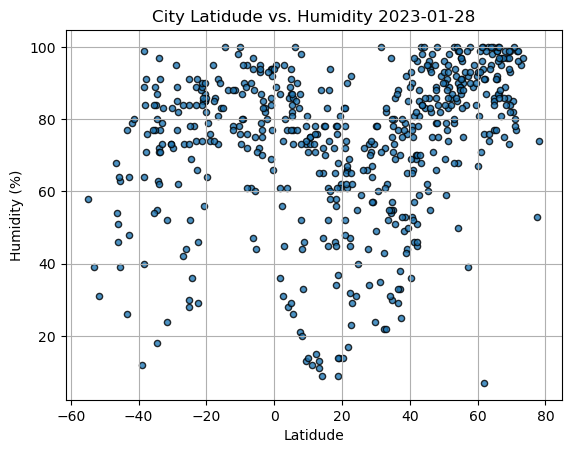

In [38]:
# Build the scatter plots for latitude vs. humidity
ax1 = city_data_df.plot.scatter(
    x='Lat', y='Humidity', edgecolor='black', alpha=0.8, marker='o')


# Incorporate the other graph properties
plt.title("City Latidude vs. Humidity 2023-01-28")
plt.ylabel("Humidity (%)")
plt.xlabel("Latidude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

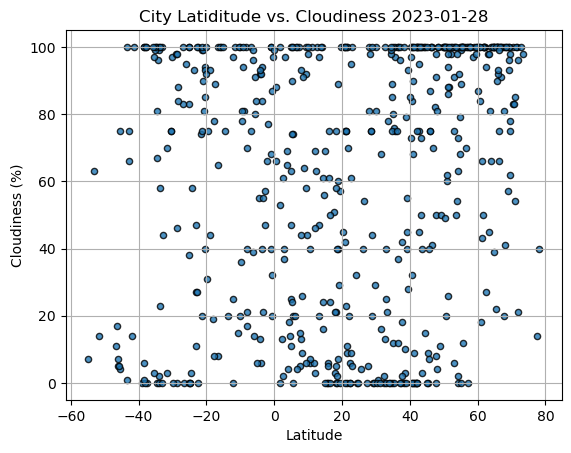

In [39]:
# Build the scatter plots for latitude vs. cloudiness
ax1 = city_data_df.plot.scatter(
    x='Lat', y='Cloudiness', edgecolor='black', alpha=0.8, marker='o')

# Incorporate the other graph properties
plt.title("City Latiditude vs. Cloudiness 2023-01-28")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

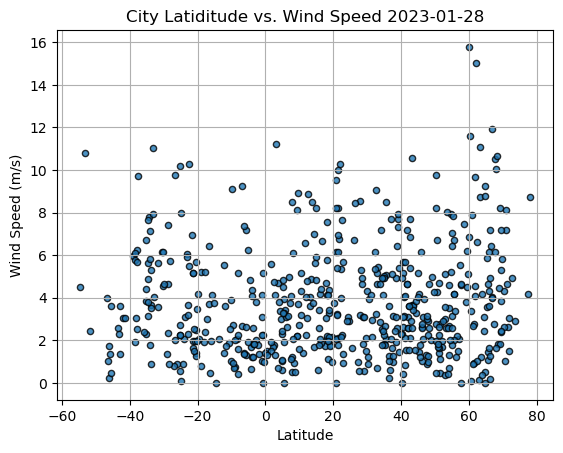

In [40]:
# Build the scatter plots for latitude vs. wind speed
ax1 = city_data_df.plot.scatter(
    x='Lat', y='Wind Speed', edgecolor='black', alpha=0.8, marker='o')

# Incorporate the other graph properties
plt.title("City Latiditude vs. Wind Speed 2023-01-28")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [44]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()


In [42]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
north_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,3.48,59,95,2.11,US,1674943325
2,cherskiy,68.7500,161.3000,-29.82,97,100,1.85,RU,1674943328
6,tiksi,71.6872,128.8694,-33.60,99,100,2.62,RU,1674943332
7,bandarbeyla,9.4942,50.8122,24.20,73,92,8.94,SO,1674943333
8,saskylakh,71.9167,114.0833,-36.88,99,96,1.49,RU,1674943334


In [43]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
south_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bambous virieux,-20.3428,57.7575,25.68,85,94,1.40,MU,1674943327
3,new norfolk,-42.7826,147.0587,18.73,48,66,1.34,AU,1674943329
4,hobart,-42.8794,147.3294,18.92,64,75,3.60,AU,1674943330
5,punta arenas,-53.1500,-70.9167,16.73,39,63,10.79,CL,1674943228
9,geraldton,-28.7667,114.6000,18.23,77,0,4.63,AU,1674943083


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7037917992563893


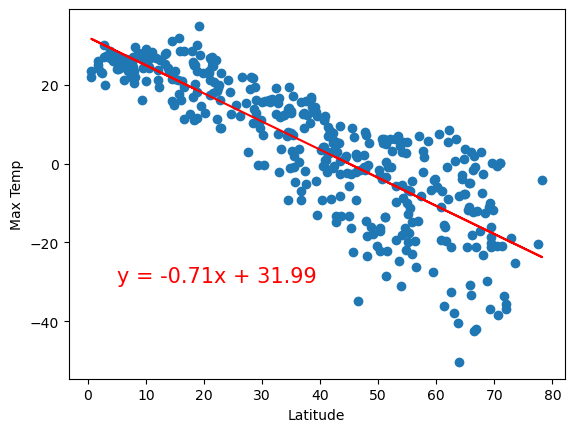

In [65]:
# Linear regression on Northern Hemisphere
x_values = north_df["Lat"]
y_values = north_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(5,-30))

The r-value is: 0.1765915022825497


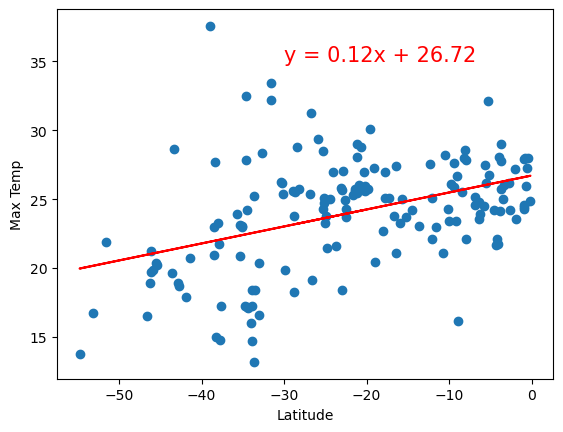

In [66]:
# Linear regression on Southern Hemisphere
x_values = south_df["Lat"]
y_values = south_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(-30,35))

**Discussion about the linear relationship:** There is a strong correlation between latitude and temperature in the north hemisphere. In the south hemisphere, on the other hand, the temperature is little affected by the elevation of the studied cities.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.21269681313977637


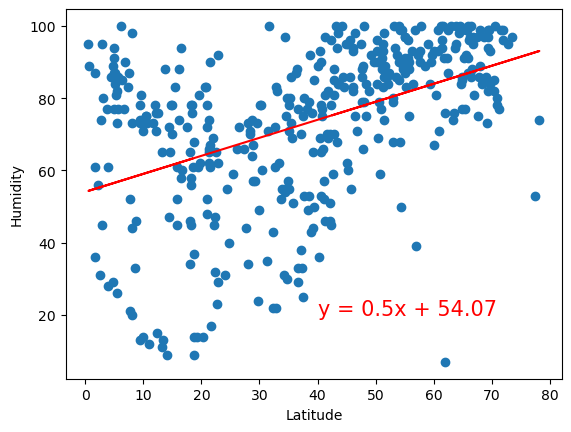

In [67]:
# Northern Hemisphere
x_values = north_df["Lat"]
y_values = north_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,20))

The r-value is: 0.16733555643578862


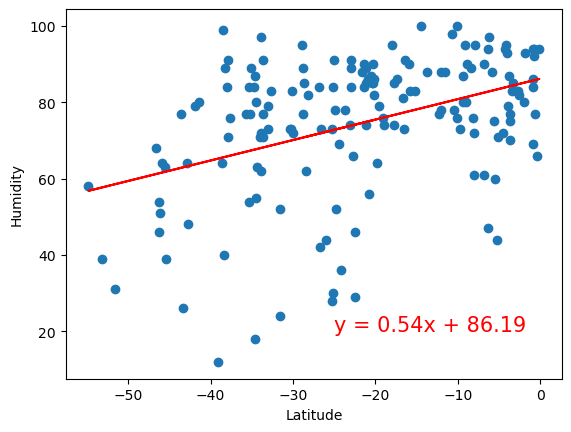

In [68]:
# Southern Hemisphere
x_values = south_df["Lat"]
y_values = south_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(-25,20))

**Discussion about the linear relationship:** Following the trend on temperature, the correlation between humidity and latitute is higher in the north hemisphere, but on an much smaller rate than the temperature. Both hemispheres have a weak correlation Humidity vs Latitute.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.12477488767106493


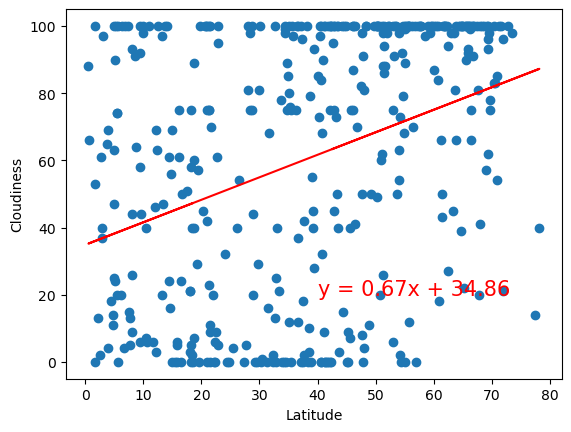

In [69]:
# Northern Hemisphere
x_values = north_df["Lat"]
y_values = north_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness',(40,20))

The r-value is: 0.03385706938795087


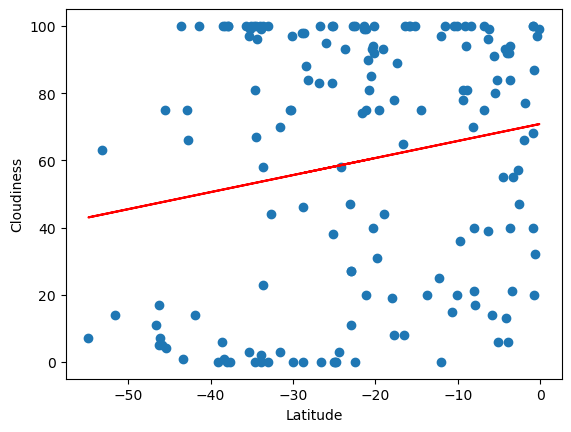

In [73]:
# Southern Hemisphere
x_values = south_df["Lat"]
y_values = south_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness',(40,20))

**Discussion about the linear relationship:** While there is some correlation between cloudiness and latitude in the north hemisphere, it is almost inexistent in the south hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.01118079488089386


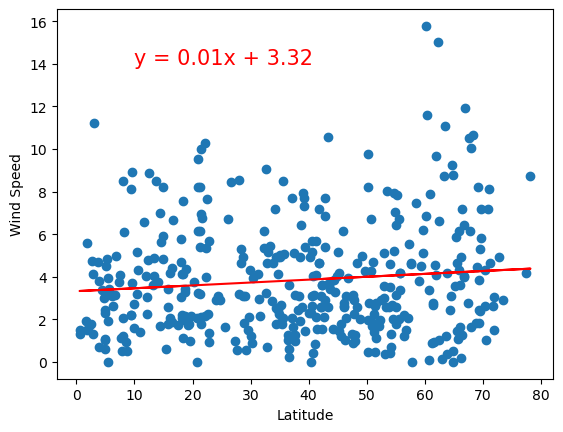

In [74]:
# Northern Hemisphere
x_values = north_df["Lat"]
y_values = north_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed',(10,14))

The r-value is: 0.054527972119161994


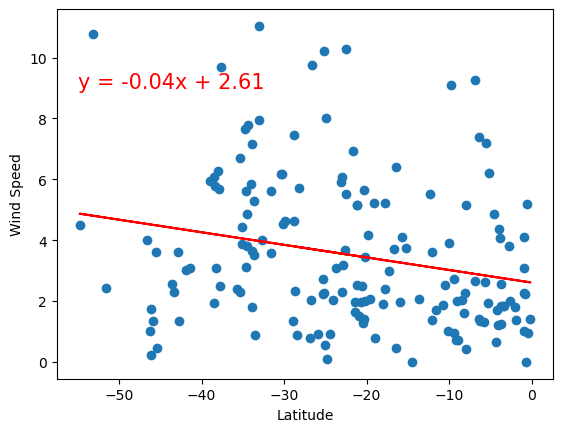

In [75]:
# Southern Hemisphere
x_values = south_df["Lat"]
y_values = south_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed',(-55,9))

**Discussion about the linear relationship:** No correlation between wind speed and latituted on both hemispheres.